In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_excel("data/Video Games.xlsx")

/Users/Kyle/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16448.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,8137.000000,8137.000000,7590.000000
mean,2006.488996,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,162.229908
std,5.877470,0.813475,0.503303,0.308836,0.186721,1.547956,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [8]:
df_critic = df[df["Critic_Score"].isna()==False]

In [15]:
df_critic.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,7983.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,7017.000000
mean,2007.192785,0.352980,0.208311,0.055028,0.072435,0.689035,68.967679,26.360821,173.432664
std,4.189425,0.896476,0.635622,0.265075,0.249204,1.816704,13.938165,18.980495,581.977516
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,0.090000,60.000000,12.000000,11.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,0.240000,71.000000,21.000000,27.000000
75%,2010.000000,0.340000,0.180000,0.010000,0.060000,0.650000,79.000000,36.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [9]:
df_critic["Nintendo"] = [1 if i == "Nintendo" else 0 for i in df_critic["Developer"]]

<ipython-input-9-99929788091e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critic["Nintendo"] = [1 if i == "Nintendo" else 0 for i in df_critic["Developer"]]


<ipython-input-10-9aefcc6011cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critic.dropna(inplace=True)


Coefficients: 
 [7.08565431]
Mean squared error: 4.31
Coefficient of determination: 0.13


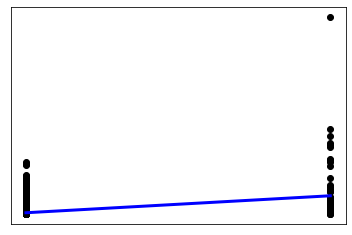

In [10]:

import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df_critic.dropna(inplace=True)

# Use only one feature
X = df_critic[["Nintendo"]]
y = df_critic["Global_Sales"]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X, y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, diabetes_y_pred))

# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
from statsmodels.formula.api import ols

mod = ols('Global_Sales ~ Nintendo', data=df_critic).fit()
                
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     1006.
Date:                Sat, 11 Sep 2021   Prob (F-statistic):          4.81e-206
Time:                        10:12:38   Log-Likelihood:                -13819.
No. Observations:                6825   AIC:                         2.764e+04
Df Residuals:                    6823   BIC:                         2.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7070      0.022     31.703      0.000       0.663       0.751
Nintendo       7.0857      0.223     31.716      0.000       6.648       7.524
==============================================================================
Omnibus:                    12836.202   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55796190.082
Skew:                          13.851   Prob(JB):                         0.00
Kurtosis:                     445.085   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df_dev = pd.get_dummies(df_critic["Developer"])

In [13]:
df_dev.head()

,2015,"10tacle Studios, Fusionsphere Systems","1C, 1C Company","1C, Ino-Co, 1C Company",1C: Maddox Games,1C:Ino-Co,1st Playable Productions,2D Boy,2K Australia,2K Czech,...,h.a.n.d. Inc.,iNiS,id Software,"id Software, Nerve Software","id Software, Raven Software",n-Space,neo Software,odenis studio,syn Sophia,zSlide
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:

import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df_critic.dropna(inplace=True)

# Use only one feature
X = df_critic[["Nintendo", "Critic_Score"]].values
y = df_critic["Global_Sales"]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X, y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, diabetes_y_pred))

# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [6.77608847 0.03005163]


<ipython-input-15-432e72485d65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critic.dropna(inplace=True)


ValueError: y_true and y_pred have different number of output (2!=1)

In [16]:
X = df_critic[["Nintendo", "Critic_Score"]]
y = df_critic["Global_Sales"]

pd.ols(X, y)

AttributeError: module 'pandas' has no attribute 'ols'